<a href="https://colab.research.google.com/github/ajitkumarkp/ML/blob/master/Pretrained_Imagenet_Models_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font style="color:rgb(50,120,229)">Using Pre-trained models </font>

In this chapter we will learn how to use pre-trained models trained on large datasets like ImageNet. Sometimes we get lucky, and the problem we are trying to solve is already solved by other researchers who have generously released a trained model. We will learn how to load and use these models for inference. 

## <font style="color:rgb(50,120,229)">What is ImageNet</font>
ImageNet is a project which aims to provide a large image database for research purposes. It contains more than 14 million images which belong to more than 20,000 classes ( or synsets ). They also provide bounding box annotations for around 1 million images, which can be used in Object Localization tasks. It should be noted that they only provide urls of images and you need to download those images.

## <font style="color:rgb(50,120,229)">What is ILSVRC</font>
ImageNet Large Scale Visual Recognition Challenge ( ILSVRC ) is an annual competition organized by the ImageNet team since 2010, where research teams evaluate their computer vision algorithms various visual recognition tasks such as Object Classification and Object Localization. The training data is a subset of ImageNet with 1.2 million images belonging to 1000 classes. Deep Learning came to limelight in 2012 when Alex Krizhevsky and his team won the competition by a margin of a whooping 11%. ILSVRC and Imagenet are sometimes used interchangeably.


## <font style="color:rgb(50,120,229)">Pre-trained models present in Keras</font>
The winners of ILSVRC have been very generous in releasing their models to the open-source community. There are many models such as AlexNet, VGGNet, Inception, ResNet, Xception and many more which we can choose from, for our own task. Apart from the ILSVRC winners, many research groups also share their models which they have trained for similar tasks, e.g, MobileNet, SqueezeNet etc.

These networks are trained for classifying images into one of 1000 categories or classes.

Keras comes bundled with many models. A trained model has two parts - Model Architecture and Model Weights. The weights are large files and thus they are not bundled with Keras. However, the weights file is automatically downloaded ( one-time ) if you specify that you want to load the weights trained on ImageNet data. It has the following models ( the list keeps on getting updated ):

- VGG16,
- InceptionV3,
- ResNet,
- MobileNet,
- Xception,
- InceptionResNetV2

## <font style="color:rgb(50,120,229)">Import the required image preprocessing functions</font>

In [1]:
try:
    from tensorflow.keras.preprocessing.image import load_img
    from tensorflow.keras.preprocessing.image import img_to_array
    from tensorflow.keras.applications.imagenet_utils import decode_predictions
    print("Using Tensorflow")
except:
    from keras.preprocessing.image import load_img
    from keras.preprocessing.image import img_to_array
    from keras.applications.imagenet_utils import decode_predictions
    print("Using Keras")
    
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

Using Tensorflow


## <font style="color:rgb(50,120,229)">Load the models from keras applications folder</font>
We can load the models in Keras using the following code. Note that we have mentioned `weights='imagenet'`. This means that the network will be initialized with the weights it learnt using ImageNet.

In [2]:
try:
    from tensorflow.keras.applications import vgg16, inception_v3, resnet50, mobilenet
except:
    from keras.applications import vgg16, inception_v3, resnet50, mobilenet
vgg_model = vgg16.VGG16(weights='imagenet')

inception_model = inception_v3.InceptionV3(weights='imagenet')

resnet_model = resnet50.ResNet50(weights='imagenet')

mobilenet_model = mobilenet.MobileNet(weights='imagenet')

17227776/17225924 [==============================] - 0s 0us/step


## <font style="color:rgb(50,120,229)">Download an Image</font>

In [3]:
import urllib.request
filename = 'dog.jpg'
url_of_image = "https://upload.wikimedia.org/wikipedia/commons/9/9c/Yellow_Labrador_Retriever_2.jpg"
urllib.request.urlretrieve(url_of_image,filename)

('dog.jpg', <http.client.HTTPMessage at 0x7fec4ddf29e8>)

## <font style="color:rgb(50,120,229)">Pre-processing before feeding the image to the network</font>
We can load the image using any library such as OpenCV, PIL, skimage etc. Keras also provides an image module which provides functions to import images and perform some basic pre-processing required before feeding it to the network for prediction. We will use the keras functions for loading and pre-processing the image.

### <font style="color:rgb(8,133,37)">We perform the following pre-processing to the image</font>

1. Keras loads the image using PIL library. This is done using the **load_img** function. The image is in width x height x channels format.
2. Convert the image from PIL format to Numpy format ( height x width x channels ) using **image_to_array** function.
3. Form a batch of image( s ) to feed the network. This is done using the **expand_dims** function in Numpy

We have displayed the image to show you how the array is expanded and the batch is created.

PIL image size (224, 224)


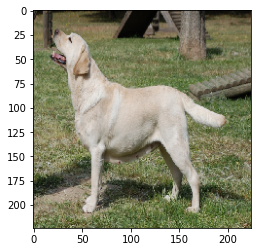

numpy array size (224, 224, 3)


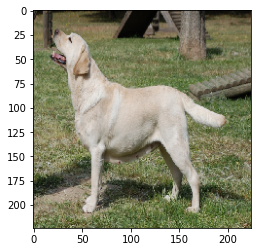

image batch size (1, 224, 224, 3)


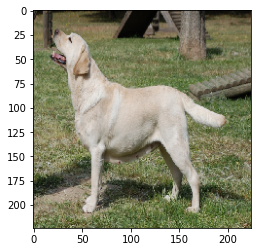

In [4]:
# load an image in PIL format
original = load_img(filename, target_size=(224, 224))
print('PIL image size',original.size)
plt.imshow(original)
plt.show()

# convert the PIL image to a numpy array
# IN PIL - image is in (width, height, channel)
# In Numpy - image is in (height, width, channel)
numpy_image = img_to_array(original)
print('numpy array size',numpy_image.shape)
plt.imshow(np.uint8(numpy_image))
plt.show()

# Convert the image / images into batch format
# expand_dims will add an extra dimension to the data at a particular axis
# We want the input matrix to the network to be of the form (batchsize, height, width, channels)
# Thus we add the extra dimension to the axis 0.
image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)
plt.imshow(np.uint8(image_batch[0]))

## <font style="color:rgb(50,120,229)">Predicting the Object Class</font>
Once we have the image in the right format, we can feed it to the network and get the predictions. The image we got in the previous step should be normalized by subtracting the mean of the ImageNet data. This is because the network was trained on the images after this pre-processing. We follow the following steps to get the classification results.

1. **Preprocess the input** by subtracting the mean value from each channel of the images in the batch. Mean is an array of three elements obtained by the average of R, G, B pixels of all images obtained from ImageNet. The values for Imagenet are : [ 103.939, 116.779, 123.68 ]. This is done using the `preprocess_input()` function.
2. **Get the classification result**, which is a Tensor of dimension ( batchsize x 1000 ). This is done by `model.predict()` function.
3. **Convert the result to human-readable labels** - The vector obtained above has too many values to make any sense. Keras provides a function `decode_predictions()` which takes the classification results, sorts it according to the confidence of prediction and gets the class name ( instead of a class-number ). We can also specify how many results we want, using the top argument in the function. The output shows the class ID, class name and the confidence of prediction.

Now, let us see what the different networks predict using the above steps.

### <font style="color:rgb(8,133,37)">VGG16 Network</font>

In [5]:
# prepare the image for the VGG model
processed_image = vgg16.preprocess_input(image_batch.copy())

# get the predicted probabilities for each class
predictions = vgg_model.predict(processed_image)
# print predictions
# convert the probabilities to class labels
# We will get top 5 predictions which is the default
label_vgg = decode_predictions(predictions)
label_vgg

40960/35363 [==================================] - 0s 0us/step


[[('n02099712', 'Labrador_retriever', 0.4182558),
  ('n02104029', 'kuvasz', 0.04926094),
  ('n02099601', 'golden_retriever', 0.047181167),
  ('n02090721', 'Irish_wolfhound', 0.033756778),
  ('n02109047', 'Great_Dane', 0.033755507)]]

### <font style="color:rgb(8,133,37)">ResNet50 Network</font>

In [6]:
# prepare the image for the ResNet50 model
processed_image = resnet50.preprocess_input(image_batch.copy())

# get the predicted probabilities for each class
predictions = resnet_model.predict(processed_image)

# convert the probabilities to class labels
# If you want to see the top 3 predictions, specify it using the top argument
label_resnet = decode_predictions(predictions, top=3)
label_resnet

[[('n02099712', 'Labrador_retriever', 0.38010594),
  ('n02108422', 'bull_mastiff', 0.086109936),
  ('n02091831', 'Saluki', 0.040382266)]]

### <font style="color:rgb(8,133,37)">MobileNet Network</font>

In [7]:
# prepare the image for the MobileNet model
processed_image = mobilenet.preprocess_input(image_batch.copy())

# get the predicted probabilities for each class
predictions = mobilenet_model.predict(processed_image)

# convert the probabilities to imagenet class labels
label_mobilenet = decode_predictions(predictions)
label_mobilenet

[[('n02099712', 'Labrador_retriever', 0.9153535),
  ('n02099601', 'golden_retriever', 0.045646757),
  ('n02104029', 'kuvasz', 0.0125556),
  ('n02108422', 'bull_mastiff', 0.004722732),
  ('n02099849', 'Chesapeake_Bay_retriever', 0.0034816233)]]

### <font style="color:rgb(8,133,37)">Inception_V3 Network</font>

+ The input size for inception network is different from the other networks. It accepts inputs of size (299, 299).
+ Thus we load the image with target size according to that.

In [8]:
# load an image in PIL format
original = load_img(filename, target_size=(299, 299))

# Convert the PIL image into numpy array
numpy_image = img_to_array(original)

# reshape data in terms of batchsize
image_batch = np.expand_dims(numpy_image, axis=0)

# prepare the image for the Inception model
processed_image = inception_v3.preprocess_input(image_batch.copy())

# get the predicted probabilities for each class
predictions = inception_model.predict(processed_image)

# convert the probabilities to class labels
label_inception = decode_predictions(predictions)
label_inception

[[('n02099712', 'Labrador_retriever', 0.8580082),
  ('n02099601', 'golden_retriever', 0.059228506),
  ('n02108422', 'bull_mastiff', 0.005231765),
  ('n02104029', 'kuvasz', 0.0042728344),
  ('n02099849', 'Chesapeake_Bay_retriever', 0.0029693835)]]

## <font style="color:rgb(50,120,229)">Comparison of Results from various Models</font>
Let us see what the different models say for a few images.

Giving a cat image as input, and running it on the 4 models, we get the following output.

In [9]:
import cv2
numpy_image = np.uint8(img_to_array(original)).copy()
numpy_image = cv2.resize(numpy_image,(900,900))

x = 200

cv2.putText(numpy_image, "VGG16: {}, {:.2f}".format(label_vgg[0][0][1], label_vgg[0][0][2]) , (x, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
cv2.putText(numpy_image, "MobileNet: {}, {:.2f}".format(label_mobilenet[0][0][1], label_mobilenet[0][0][2]) , (x, 75), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
cv2.putText(numpy_image, "Inception: {}, {:.2f}".format(label_inception[0][0][1], label_inception[0][0][2]) , (x, 110), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
cv2.putText(numpy_image, "ResNet50: {}, {:.2f}".format(label_resnet[0][0][1], label_resnet[0][0][2]) , (x, 145), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
numpy_image = cv2.resize(numpy_image, (700,700))
cv2.imwrite("{}_output.jpg".format(filename.split('/')[-1].split('.')[0]),cv2.cvtColor(numpy_image, cv2.COLOR_RGB2BGR))

True

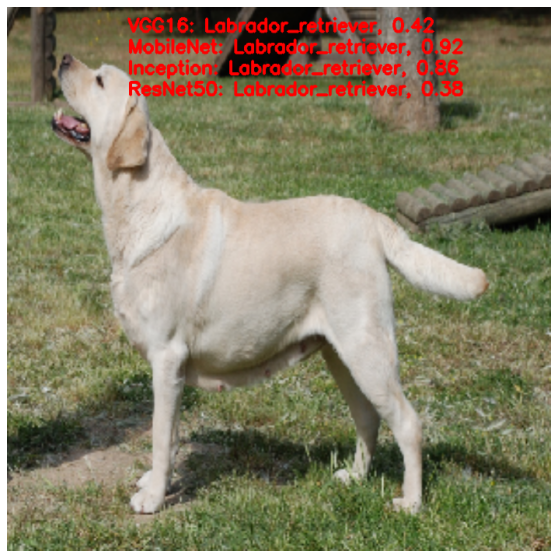

In [10]:
plt.figure(figsize=[10,10])
plt.imshow(numpy_image)
plt.axis('off');